In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
df = pd.read_parquet("https://osf.io/gk2ty/download")


In [3]:
df.columns


Index(['Task', 'Treatment', 'Genome Length', 'Lineage Generation Index',
       'Run ID', 'Is Task Coding Site', 'Is Viability Site',
       'Is Task Coding Site Cumulative Count',
       'Is Viability Site Cumulative Count',
       'Prev Is Task Coding Site Cumulative Count',
       'Prev Is Viability Site Cumulative Count', 'Prev Is Task Coding Site',
       'Prev Is Viability Site', 'Site', 'Has Task', 'has task',
       'delta has task', 'Delta Has Task', 'CHILD_SOURCE_MAP',
       'POINT_MUTATION_BOOL_MASK', 'SLIP_INSERTION_ORIGIN_BOOL_MASK',
       'SLIP_INSERTION_RESULT_BOOL_MASK', 'GENOME_CHARACTERS',
       'Is Task Coding Site Delta', 'Is Viability Site Delta',
       'Point Mutation Cumulative Count', 'Slip Insertion Cumulative Count',
       'Prev Slip Insertion Cumulative Count', 'SLIP_INSERTION_BOOL_MASK',
       'Generation Born', 'Update Born'],
      dtype='object')

In [4]:
df["Components"] = df["Task"].map(
    {
        "AND": 2,
        "ANDNOT": 3,
        "NAND": 1,
        "NOR": 4,
        "NOT": 1,
        "OR": 3,
        "ORNOT": 2,
        "XOR": 4,
        "EQUALS": 5,
    },
)


In [5]:
df["codes for num tasks"] = df.groupby(
    ["Site", "Lineage Generation Index", "Treatment", "Run ID"],
    observed=True,
)["Is Task Coding Site"].transform("sum")


In [6]:
df["prev codes for num tasks"] = df.groupby(
    ["Site", "Lineage Generation Index", "Treatment", "Run ID"],
    observed=True,
)["Prev Is Task Coding Site"].transform("sum")


In [7]:
df["prev codes for tasks"] = df["prev codes for num tasks"].astype(bool)


In [8]:
df["prev coded for tasks"] = df.groupby(
    ["Site", "Lineage Generation Index", "Treatment", "Run ID"],
    observed=True,
)["Prev Is Task Coding Site Cumulative Count"].transform("sum")
df["prev coded for tasks"] = df["prev coded for tasks"].astype(bool)


In [9]:
df['First Task Generation'] = df['Generation Born'].where(
    df['has task'] != 0,
).groupby(
    [df['Treatment'], df['Run ID'], df['Task']],
    observed=True,
).transform('min')


In [10]:
df["SLIP_INSERTION_BOOL_MASK any"] = df.groupby(
    ["Lineage Generation Index", "Treatment", "Run ID"],
    observed=True,
)["SLIP_INSERTION_BOOL_MASK"].transform("any")


In [11]:
dff = df[
    (df["delta has task"] == 1)
    # & (df["Generation Born"] == df["First Task Generation"])
    # & df["Is Task Coding Site"]
].reset_index(drop=True)
dff


,Task,Treatment,Genome Length,Lineage Generation Index,Run ID,Is Task Coding Site,Is Viability Site,Is Task Coding Site Cumulative Count,Is Viability Site Cumulative Count,Prev Is Task Coding Site Cumulative Count,...,SLIP_INSERTION_BOOL_MASK,Generation Born,Update Born,Components,codes for num tasks,prev codes for num tasks,prev codes for tasks,prev coded for tasks,First Task Generation,SLIP_INSERTION_BOOL_MASK any
0,AND,Baseline-Treatment,100,37,run_1530,False,True,0,38,0,...,False,399,3981,2,0,0,False,False,399.0,False
1,AND,Baseline-Treatment,100,37,run_1530,False,True,0,38,0,...,False,399,3981,2,0,0,False,False,399.0,False
2,AND,Baseline-Treatment,100,37,run_1530,False,True,0,38,0,...,False,399,3981,2,0,0,False,False,399.0,False
3,AND,Baseline-Treatment,100,37,run_1530,False,True,0,38,0,...,False,399,3981,2,0,0,False,False,399.0,False
4,AND,Baseline-Treatment,100,37,run_1530,False,True,0,38,0,...,False,399,3981,2,0,0,False,False,399.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598815,ORNOT,Long-Ancestor-Control-Treatment,1000,33,run_1769,False,True,0,33,0,...,False,106,9625,2,0,0,False,False,34.0,False
598816,ORNOT,Long-Ancestor-Control-Treatment,1000,33,run_1769,False,True,0,33,0,...,False,106,9625,2,0,0,False,False,34.0,False
598817,ORNOT,Long-Ancestor-Control-Treatment,1000,33,run_1769,False,True,0,33,0,...,False,106,9625,2,0,0,False,False,34.0,False
598818,ORNOT,Long-Ancestor-Control-Treatment,1000,33,run_1769,False,True,0,33,0,...,False,106,9625,2,0,0,False,False,34.0,False


In [12]:
dff.columns


Index(['Task', 'Treatment', 'Genome Length', 'Lineage Generation Index',
       'Run ID', 'Is Task Coding Site', 'Is Viability Site',
       'Is Task Coding Site Cumulative Count',
       'Is Viability Site Cumulative Count',
       'Prev Is Task Coding Site Cumulative Count',
       'Prev Is Viability Site Cumulative Count', 'Prev Is Task Coding Site',
       'Prev Is Viability Site', 'Site', 'Has Task', 'has task',
       'delta has task', 'Delta Has Task', 'CHILD_SOURCE_MAP',
       'POINT_MUTATION_BOOL_MASK', 'SLIP_INSERTION_ORIGIN_BOOL_MASK',
       'SLIP_INSERTION_RESULT_BOOL_MASK', 'GENOME_CHARACTERS',
       'Is Task Coding Site Delta', 'Is Viability Site Delta',
       'Point Mutation Cumulative Count', 'Slip Insertion Cumulative Count',
       'Prev Slip Insertion Cumulative Count', 'SLIP_INSERTION_BOOL_MASK',
       'Generation Born', 'Update Born', 'Components', 'codes for num tasks',
       'prev codes for num tasks', 'prev codes for tasks',
       'prev coded for tasks', 

teeplots/col=components+kind=bar+viz=catplot+x=prev-slip-insertion-cumulative-count+y=is-task-coding-site+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=prev-slip-insertion-cumulative-count+y=is-task-coding-site+ext=.png


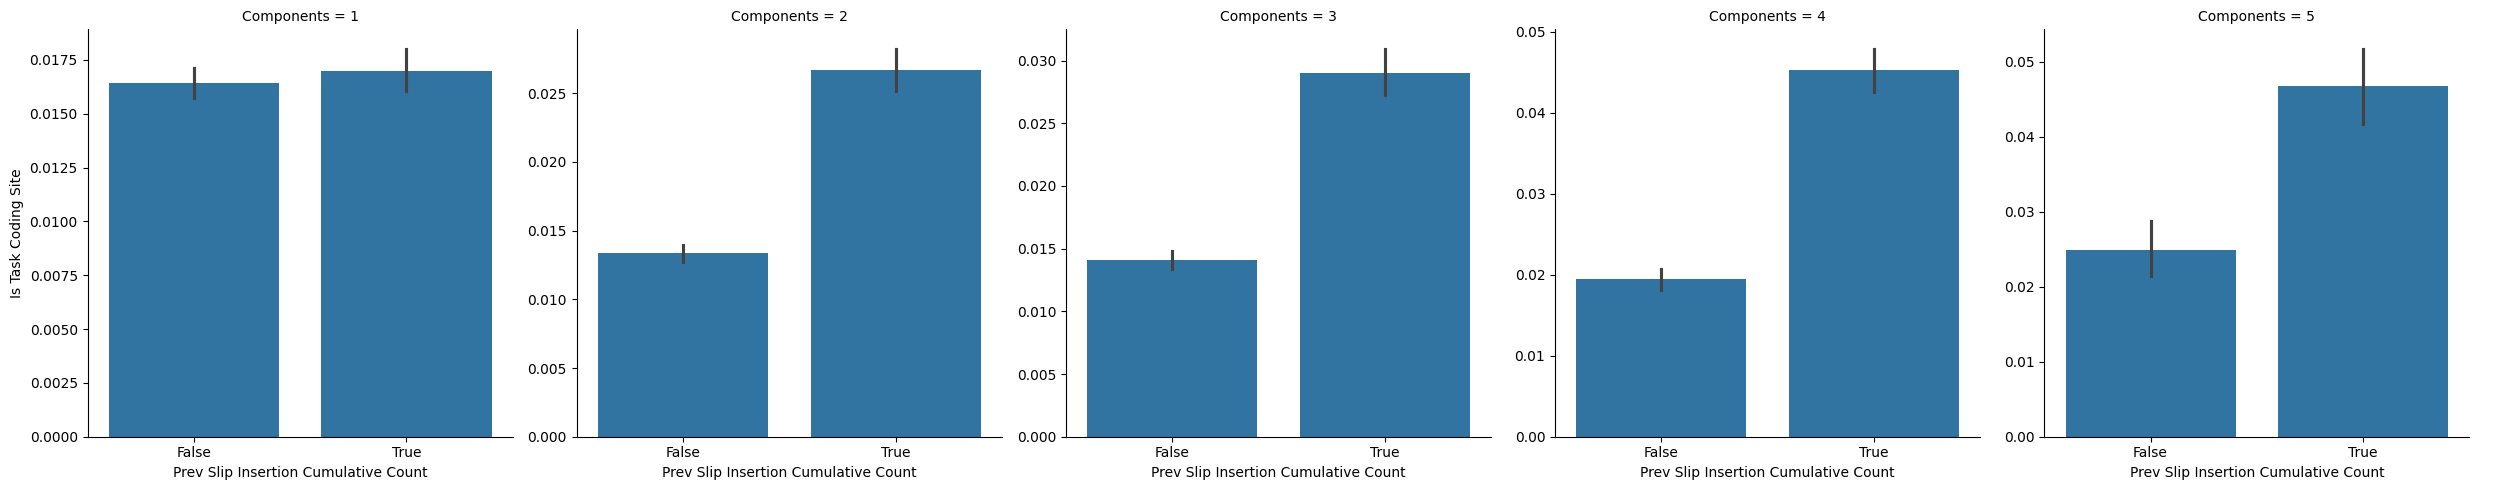

In [13]:
tp.tee(
    sns.catplot,
    data=dff[
        ~dff["Prev Is Viability Site"]
    ].astype(
        {"Prev Slip Insertion Cumulative Count": bool}
    ),
    x="Prev Slip Insertion Cumulative Count",
    y="Is Task Coding Site",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/hue=slip-insertion-cumulative-count+kind=hist+multiple=stack+viz=displot+x=components+ext=.pdf


teeplots/hue=slip-insertion-cumulative-count+kind=hist+multiple=stack+viz=displot+x=components+ext=.png


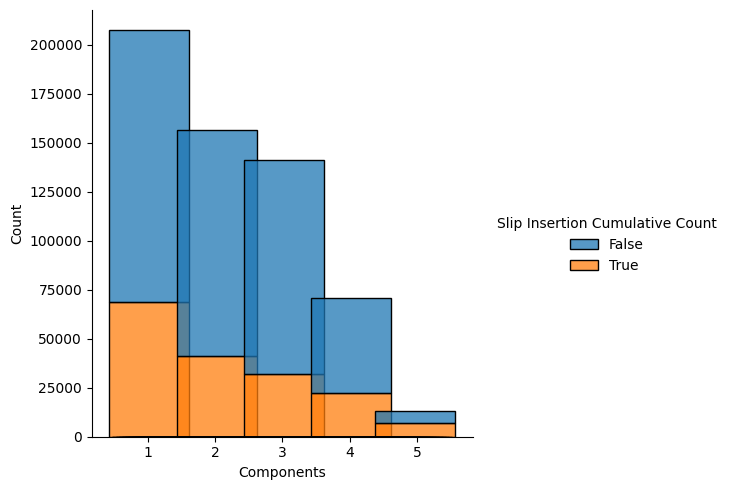

In [14]:
tp.tee(
    sns.displot,
    data=dff[
        ~dff["SLIP_INSERTION_BOOL_MASK"]
    ].astype(
        {"Slip Insertion Cumulative Count": bool},
    ),
    hue="Slip Insertion Cumulative Count",
    x="Components",
    kind="hist",
    multiple="stack",
    shrink=25,
)


teeplots/col=components+kind=bar+viz=catplot+x=prev-is-viability-site+y=is-task-coding-site+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=prev-is-viability-site+y=is-task-coding-site+ext=.png


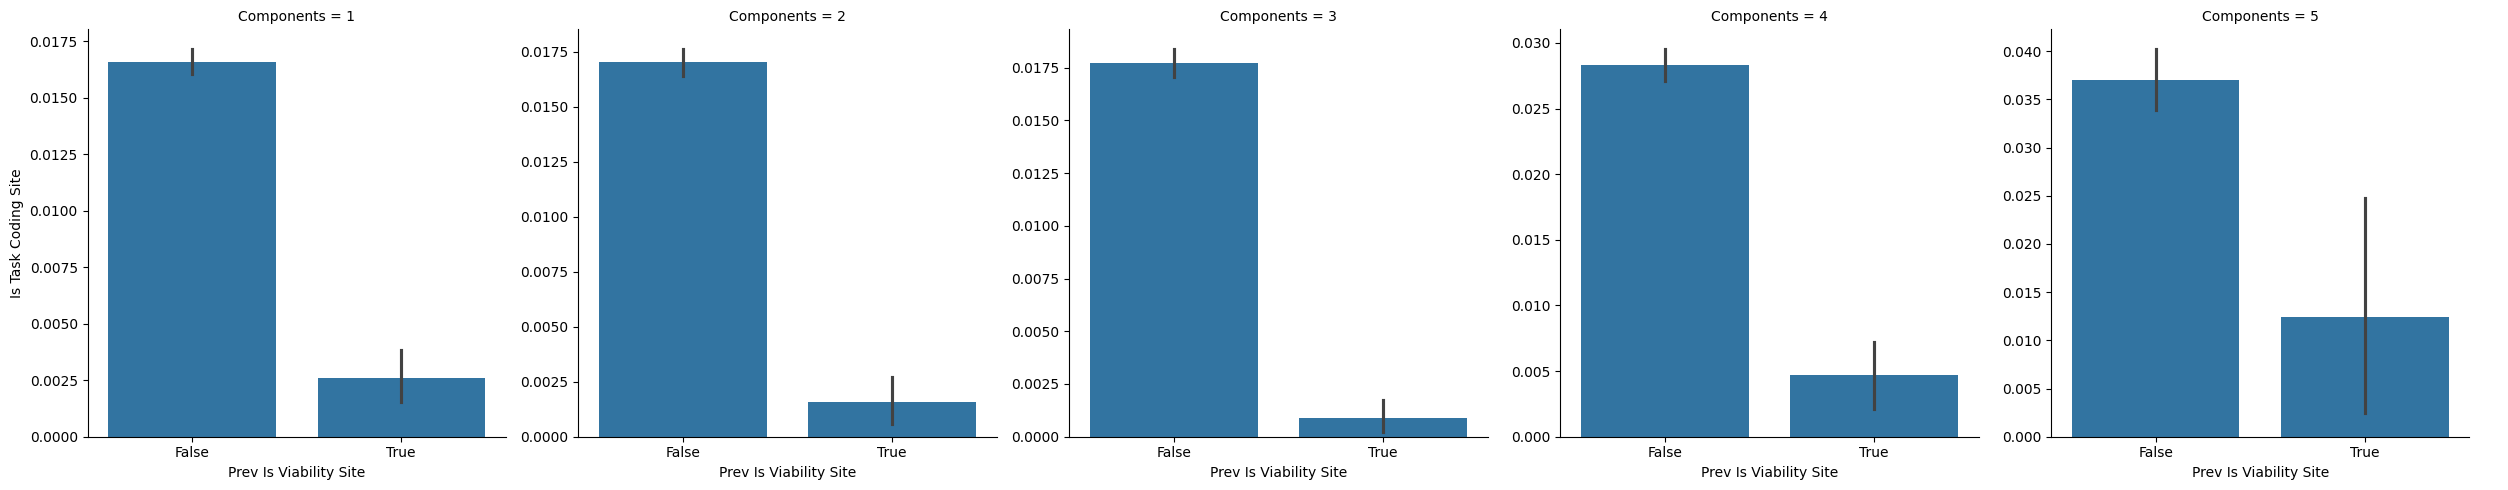

In [15]:
tp.tee(
    sns.catplot,
    data=dff.astype(
        {"Prev Is Viability Site": bool}
    ),
    x="Prev Is Viability Site",
    y="Is Task Coding Site",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/col=components+kind=bar+viz=catplot+x=prev-is-viability-site+y=prev-slip-insertion-cumulative-count+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=prev-is-viability-site+y=prev-slip-insertion-cumulative-count+ext=.png


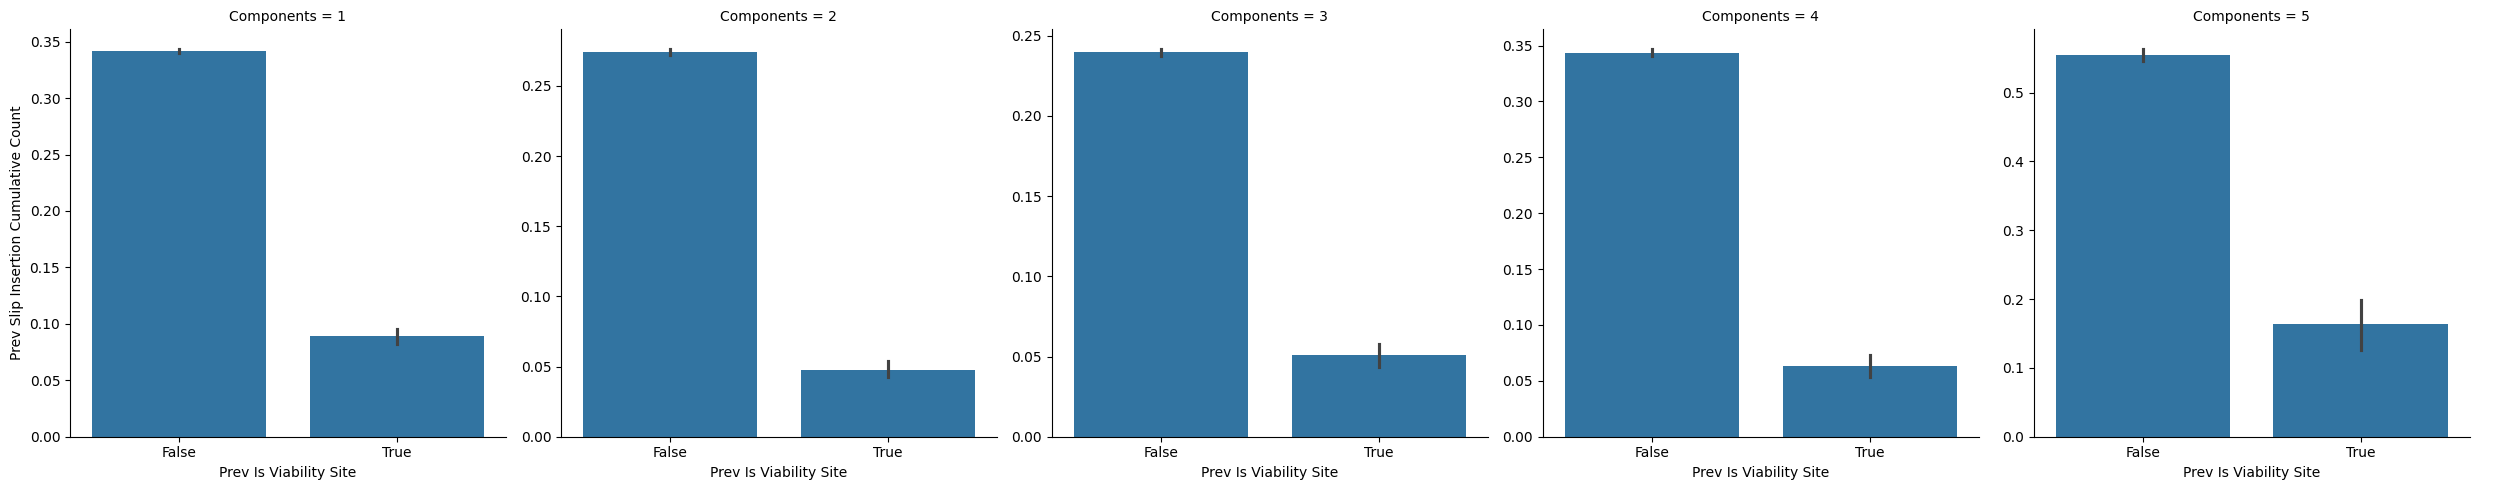

In [16]:
tp.tee(
    sns.catplot,
    data=dff.astype(
        {"Prev Slip Insertion Cumulative Count": bool}
    ),
    x="Prev Is Viability Site",
    y="Prev Slip Insertion Cumulative Count",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/col=components+kind=bar+viz=catplot+x=prev-codes-for-tasks+y=is-task-coding-site+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=prev-codes-for-tasks+y=is-task-coding-site+ext=.png


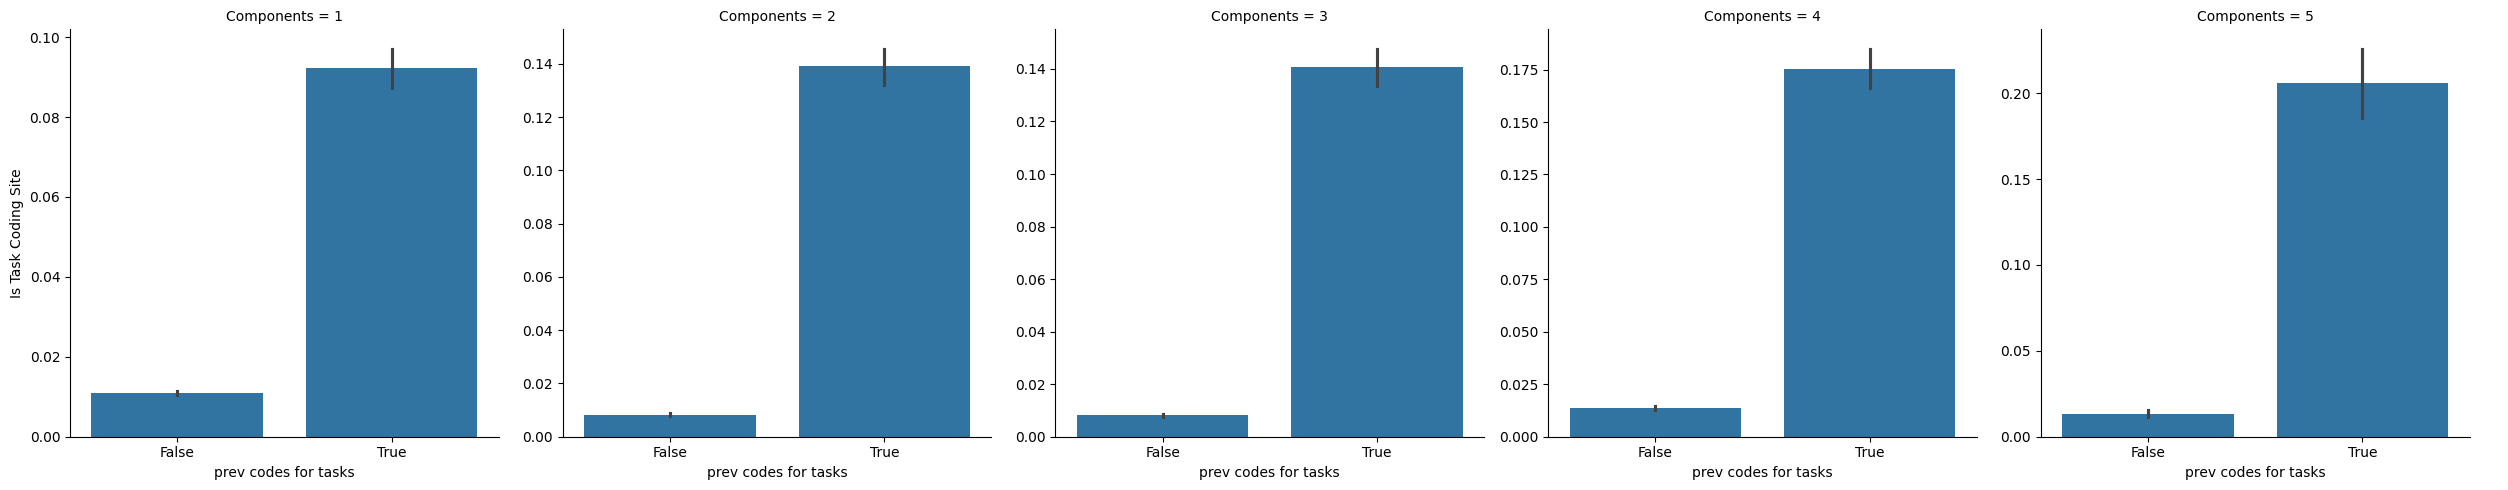

In [17]:
tp.tee(
    sns.catplot,
    data=dff.astype(
        {"Prev Slip Insertion Cumulative Count": bool}
    ),
    x="prev codes for tasks",
    y="Is Task Coding Site",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/col=components+kind=bar+viz=catplot+x=prev-slip-insertion-cumulative-count+y=prev-codes-for-tasks+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=prev-slip-insertion-cumulative-count+y=prev-codes-for-tasks+ext=.png


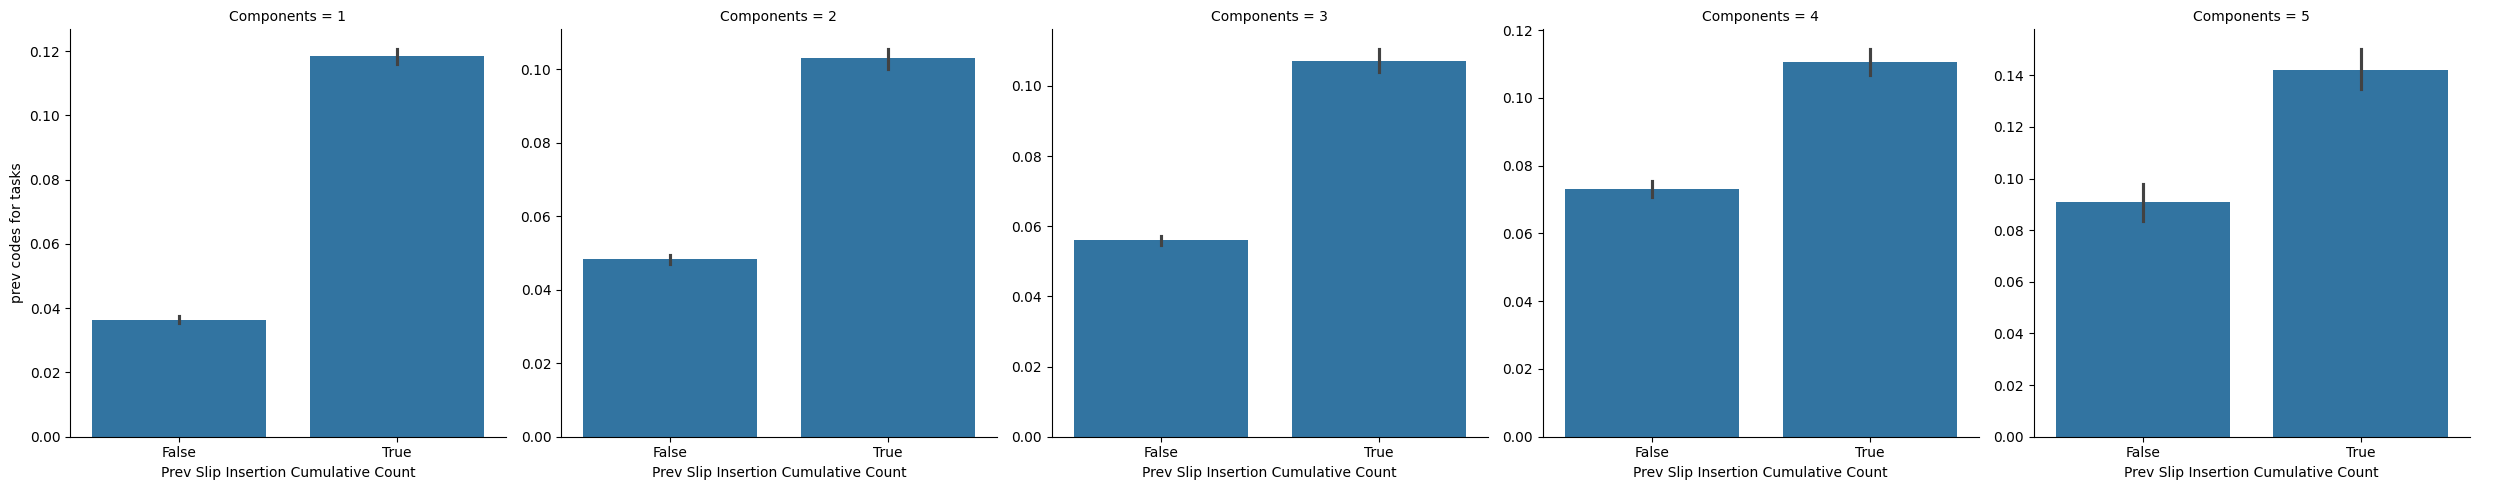

In [18]:
tp.tee(
    sns.catplot,
    data=dff.astype(
        {"Prev Slip Insertion Cumulative Count": bool}
    ),
    x="Prev Slip Insertion Cumulative Count",
    y="prev codes for tasks",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/col=components+kind=bar+viz=catplot+x=slip-insertion-bool-mask+y=is-task-coding-site+ext=.pdf


teeplots/col=components+kind=bar+viz=catplot+x=slip-insertion-bool-mask+y=is-task-coding-site+ext=.png


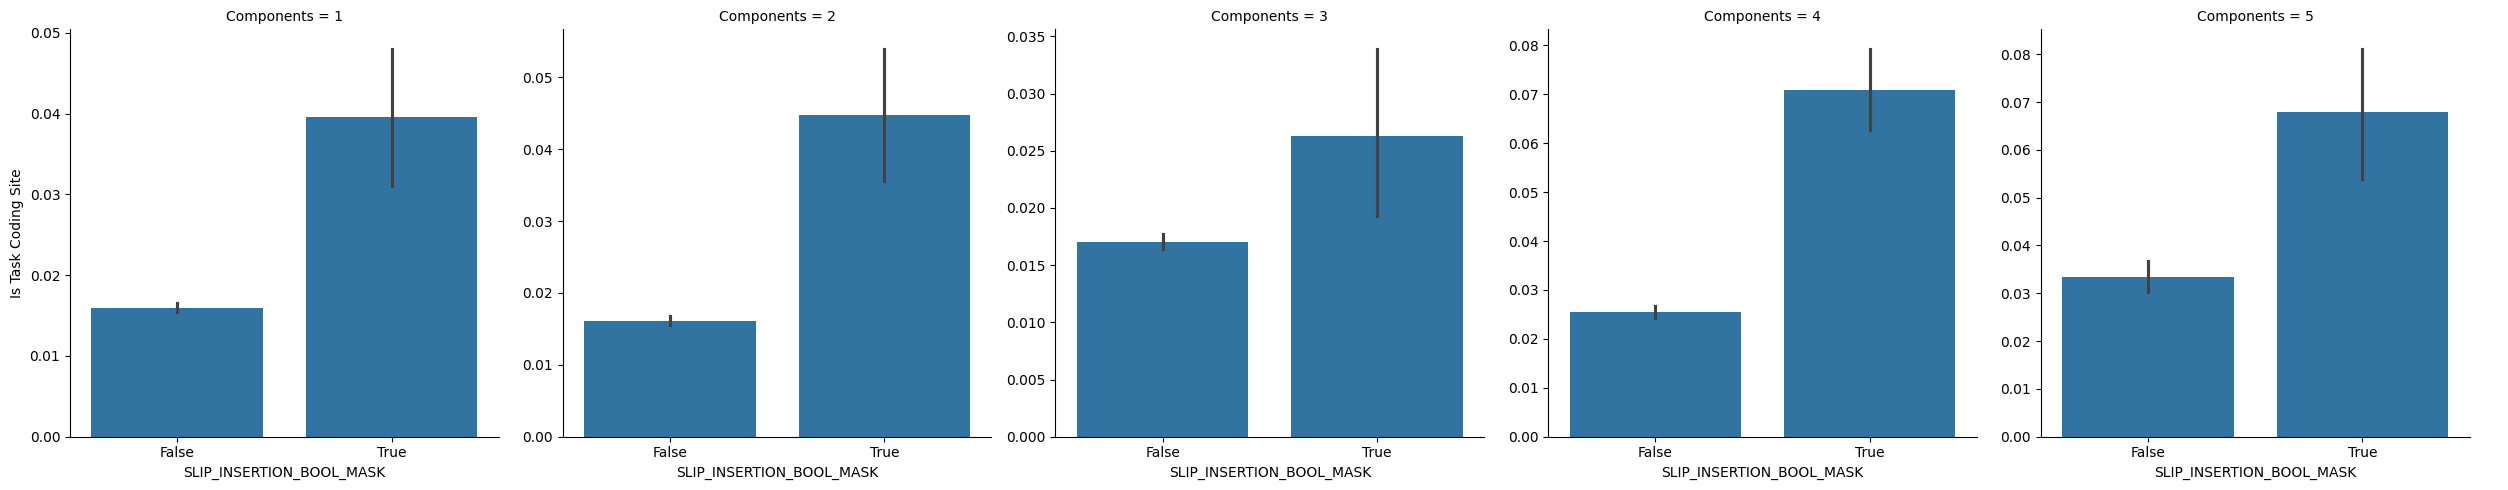

In [19]:
tp.tee(
    sns.catplot,
    data=dff.astype(
        {"Prev Slip Insertion Cumulative Count": bool}
    ),
    x="SLIP_INSERTION_BOOL_MASK",
    y="Is Task Coding Site",
    col="Components",
    kind="bar",
    sharey=False,
)


teeplots/col=components+hue=prev-codes-for-num-tasks+kind=hist+multiple=fill+row=treatment+viz=displot+x=is-task-coding-site+ext=.pdf


teeplots/col=components+hue=prev-codes-for-num-tasks+kind=hist+multiple=fill+row=treatment+viz=displot+x=is-task-coding-site+ext=.png


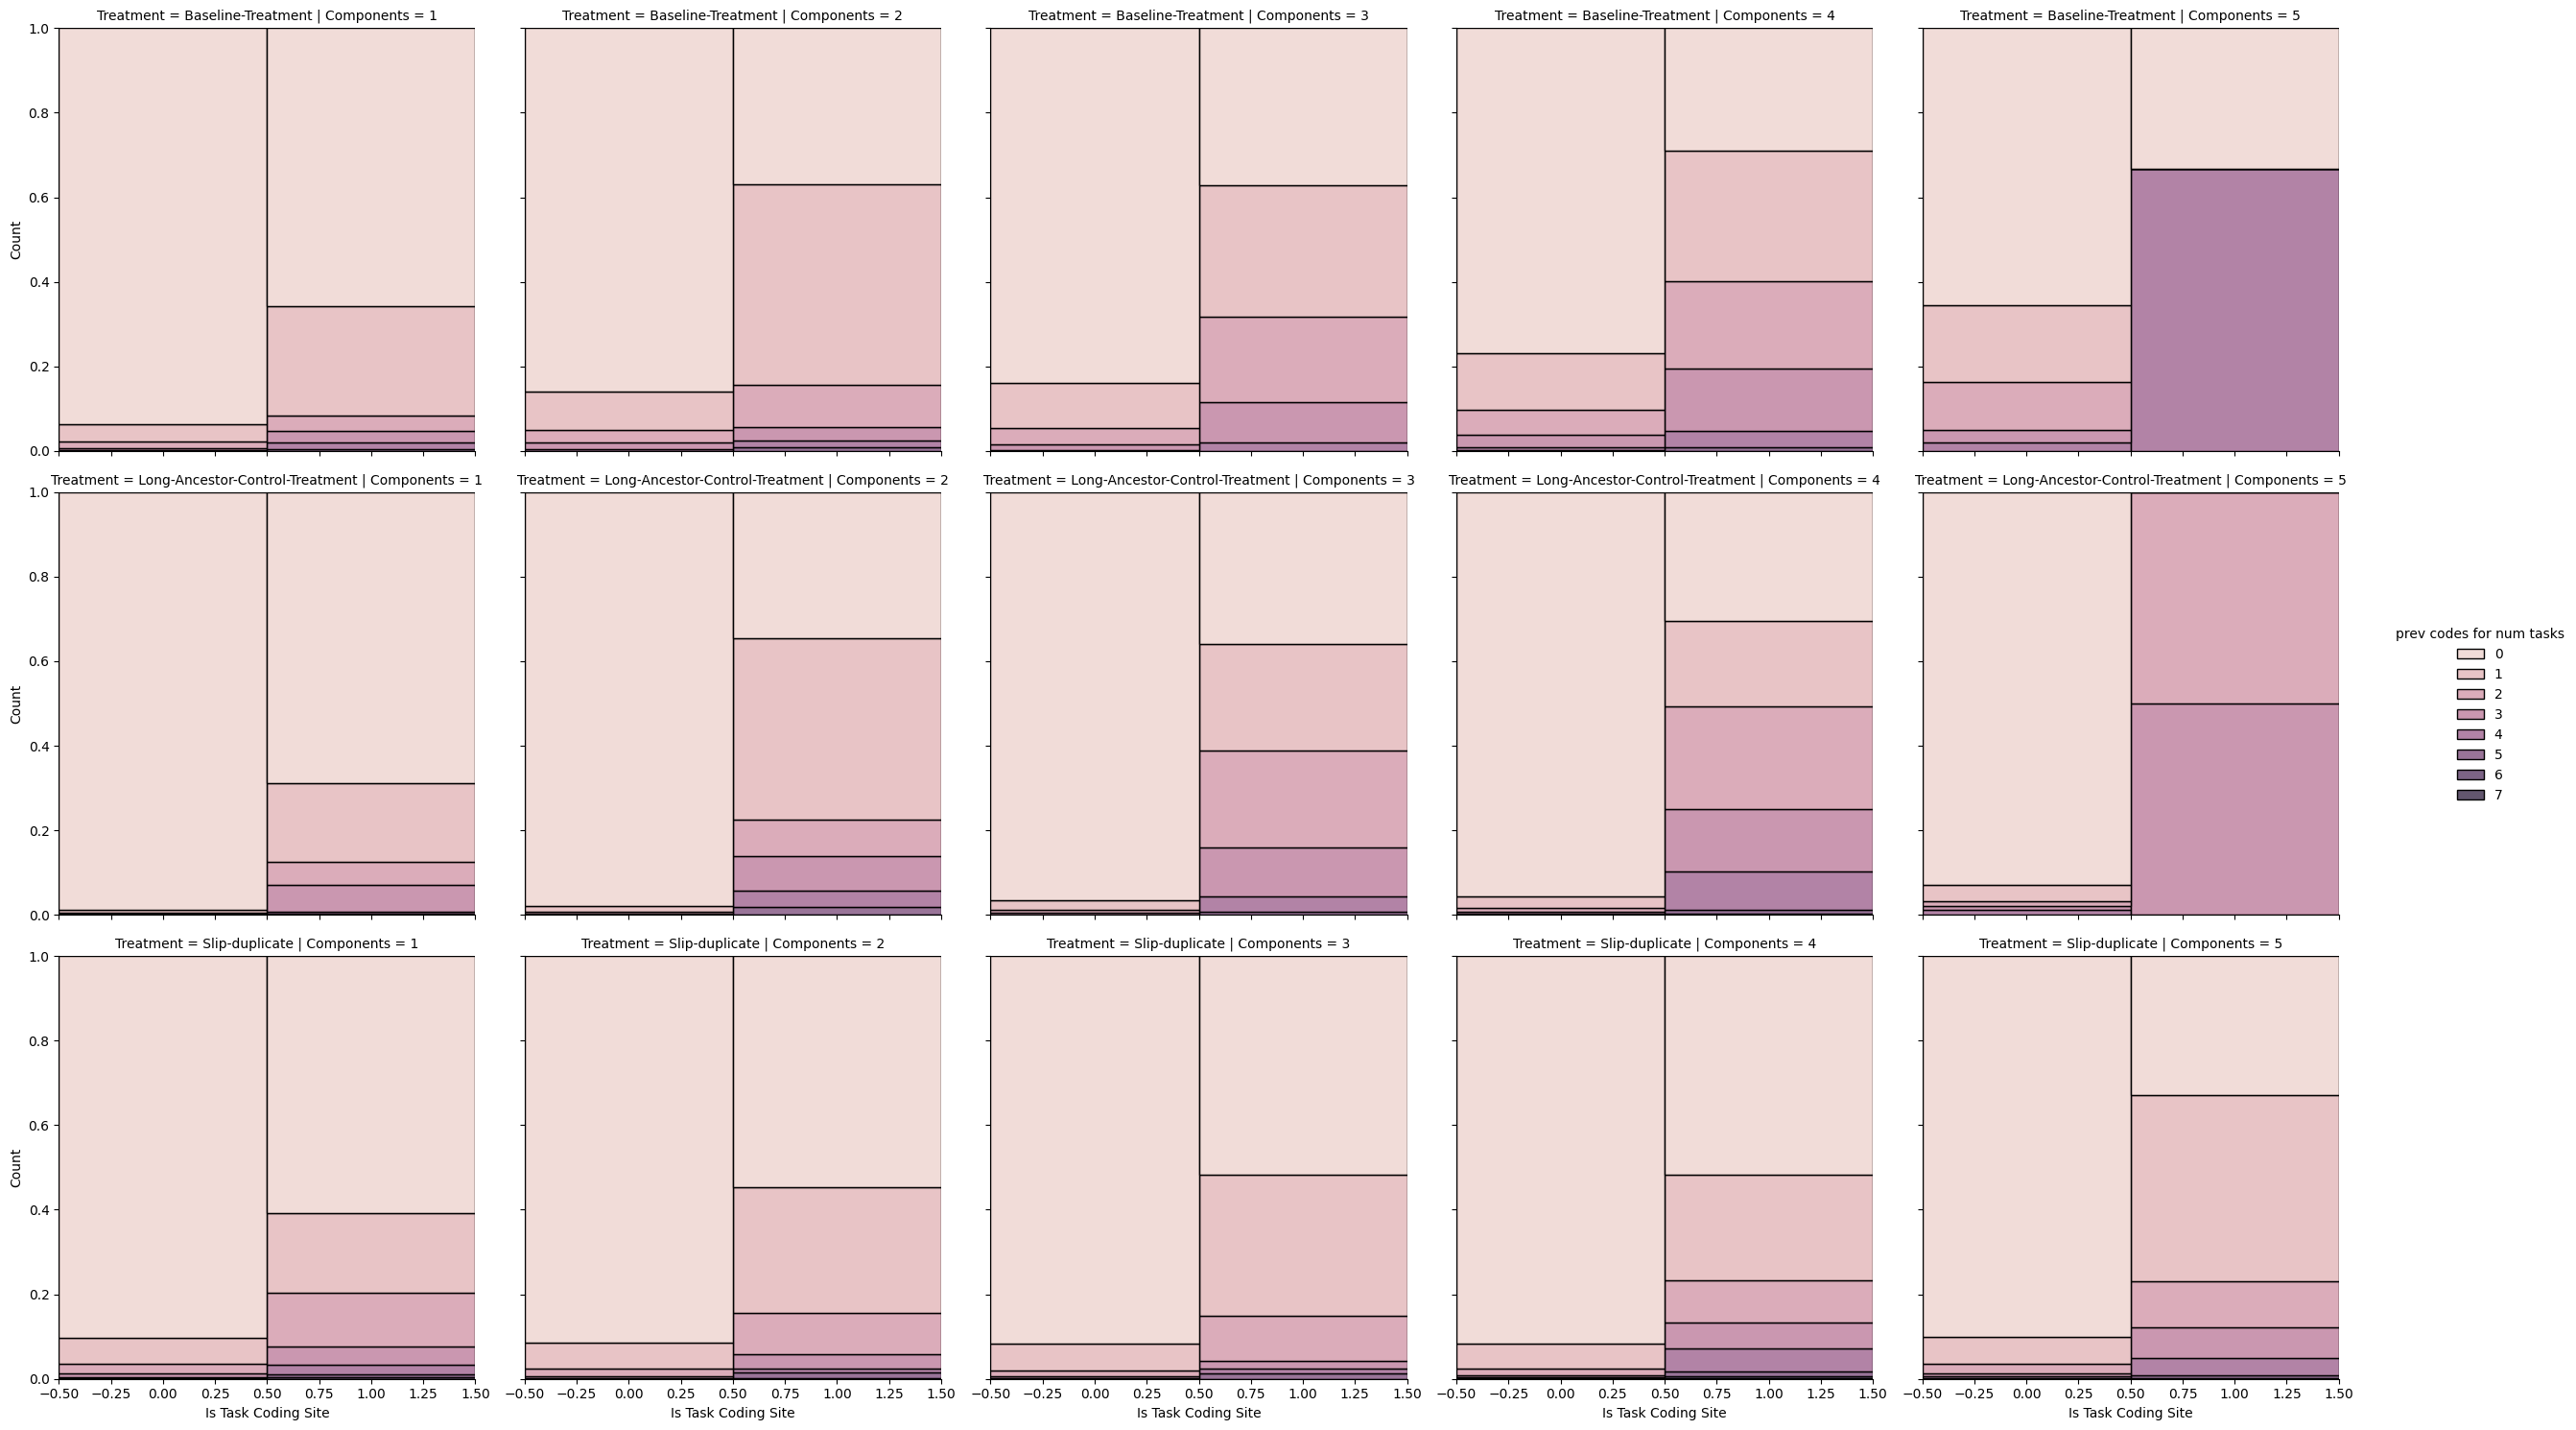

In [20]:
tp.tee(
    sns.displot,
    data=dff.astype(
        {"Is Task Coding Site": "category", "Components": "category"}
    ),
    multiple="fill",
    x="Is Task Coding Site",
    col="Components",
    kind="hist",
    hue="prev codes for num tasks",
    row="Treatment",
)


teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.pdf
teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.png


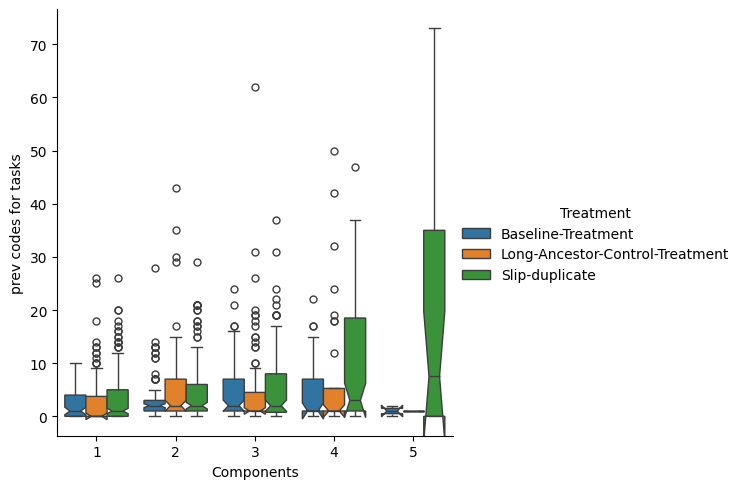

In [21]:
tp.tee(
    sns.catplot,
    data=dff[
        dff["Is Task Coding Site"]
    ].groupby(
        ["Lineage Generation Index", "Treatment", "Run ID", "Components"],
        observed=True,
    )['prev codes for tasks'].sum().reset_index(),
    hue="Treatment",
    y="prev codes for tasks",
    x="Components",
    kind="box",
    notch=True,
)


teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.pdf
teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.png


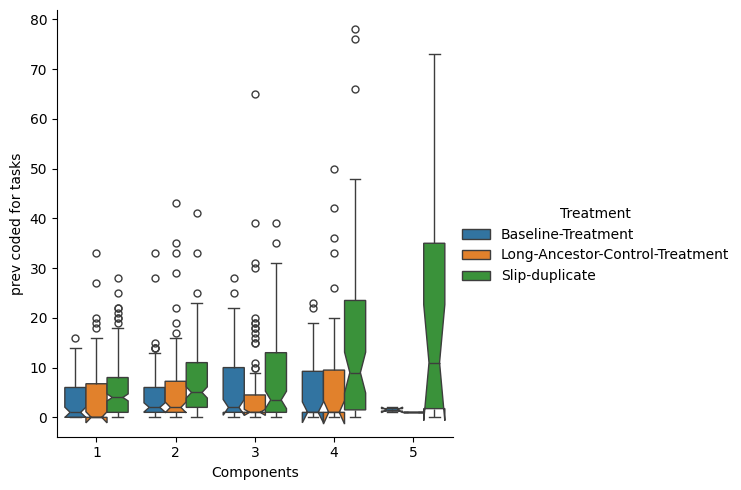

In [22]:
tp.tee(
    sns.catplot,
    data=dff[
        dff["Is Task Coding Site"]
    ].groupby(
        ["Lineage Generation Index", "Treatment", "Run ID", "Components"],
        observed=True,
    )['prev coded for tasks'].sum().reset_index(),
    hue="Treatment",
    y="prev coded for tasks",
    x="Components",
    kind="box",
    notch=True,
)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.pdf, overwriting it
  warnings.warn(
/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.png, overwriting it
  warnings.warn(


teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.pdf
teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-codes-for-tasks+ext=.png


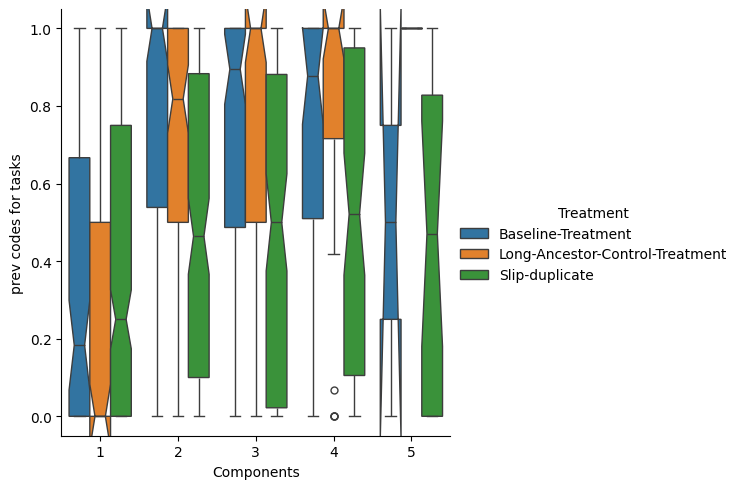

In [23]:
tp.tee(
    sns.catplot,
    data=dff[
        dff["Is Task Coding Site"]
    ].groupby(
        ["Lineage Generation Index", "Treatment", "Run ID", "Components"],
        observed=True,
    )['prev codes for tasks'].mean().reset_index(),
    hue="Treatment",
    y="prev codes for tasks",
    x="Components",
    kind="box",
    notch=True,
)


/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.pdf, overwriting it
  warnings.warn(
/home/runner/.local/lib/python3.10/site-packages/teeplot/teeplot.py:321: UserWarning: teeplot already created file teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.png, overwriting it
  warnings.warn(


teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.pdf
teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=prev-coded-for-tasks+ext=.png


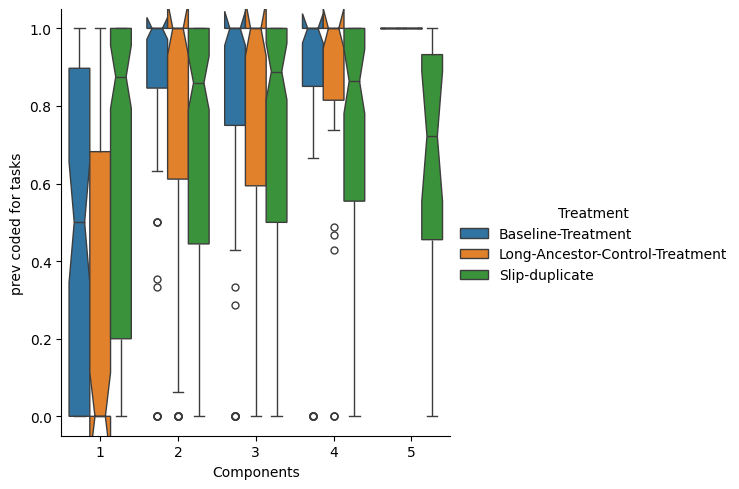

In [24]:
tp.tee(
    sns.catplot,
    data=dff[
        dff["Is Task Coding Site"]
    ].groupby(
        ["Lineage Generation Index", "Treatment", "Run ID", "Components"],
        observed=True,
    )['prev coded for tasks'].mean().reset_index(),
    hue="Treatment",
    y="prev coded for tasks",
    x="Components",
    kind="box",
    notch=True,
)


teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=one+ext=.pdf
teeplots/hue=treatment+kind=box+viz=catplot+x=components+y=one+ext=.png


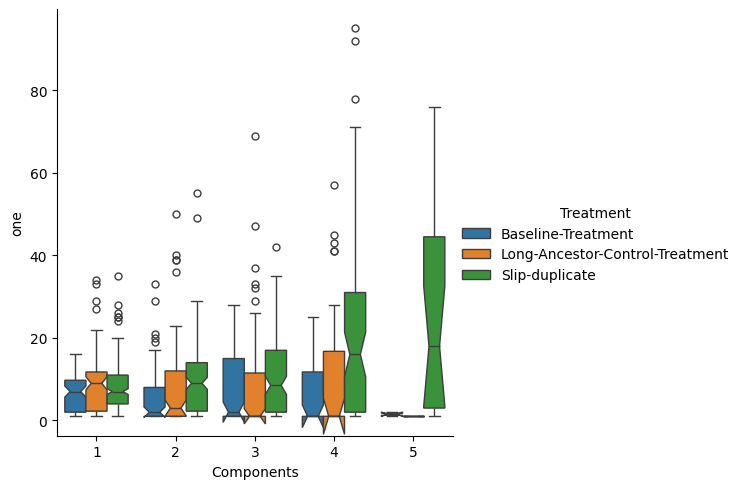

In [25]:
dff["one"] = 1
tp.tee(
    sns.catplot,
    data=dff[
        dff["Is Task Coding Site"]
    ].groupby(
        ["Lineage Generation Index", "Treatment", "Run ID", "Components"],
        observed=True,
    )['one'].sum().reset_index(),
    hue="Treatment",
    y="one",
    x="Components",
    kind="box",
    notch=True,
)
